In [2]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

# __PART 1__

DETECT AND MATCH KEYPOINTS

In [46]:
import glob
eiffel_1, eiffel_2 = glob.glob("**/*.jpg")

In [47]:
def detect_and_match_keypoints(query_image, train_image):
    # Load images
    img1 = cv2.imread(query_image, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(train_image, cv2.IMREAD_GRAYSCALE) 

    # Check if images are loaded properly
    if img1 is None or img2 is None:
        print("Error loading images")
        exit()

    # Create a SIFT detector object
    sift = cv2.SIFT_create()

    # Detect keypoints and compute descriptors
    keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

    # Create a BFMatcher object with cross-checking enabled
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

    # Match descriptors
    matches = bf.match(descriptors1, descriptors2)

    # Sort matches by distance
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw matches
    match_img = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    plt.title('Best Matching Points')
    plt.imshow(match_img),
    # plt.show()
  
    # return match_img

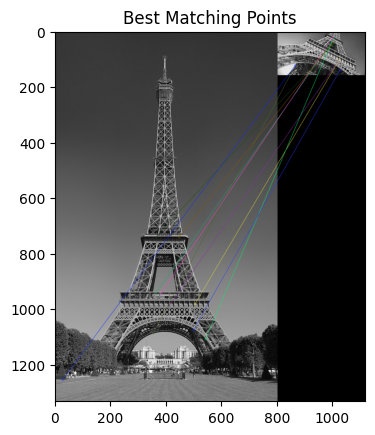

In [48]:
detect_and_match_keypoints(eiffel_1, eiffel_2)

# __PART 2__

ROTATE AND SCALE IMAGES

In [18]:
def rotate_image(original_image):
  original = cv2.imread(original_image,cv2.IMREAD_GRAYSCALE) 

  image_angle_one = cv2.rotate(original, cv2.ROTATE_90_CLOCKWISE)
  image_angle_two = cv2.rotate(original, cv2.ROTATE_180)
  image_angle_three = cv2.rotate(original, cv2.ROTATE_90_COUNTERCLOCKWISE)

  return image_angle_one, image_angle_two, image_angle_three

In [19]:
image_angle_one, image_angle_two, image_angle_three = rotate_image(eiffel_1)

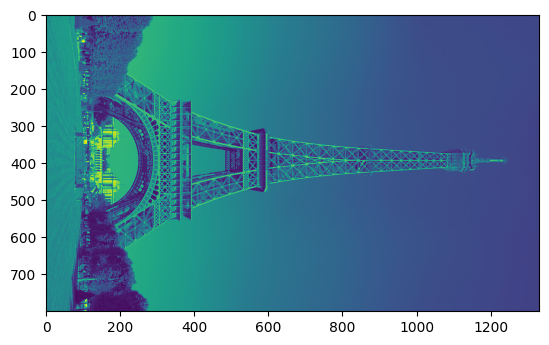

In [23]:
fig = plt.figure(1, figsize=(14, 12))
ax = fig.add_subplot(122)
ax = plt.imshow(image_angle_one)  
plt.show()

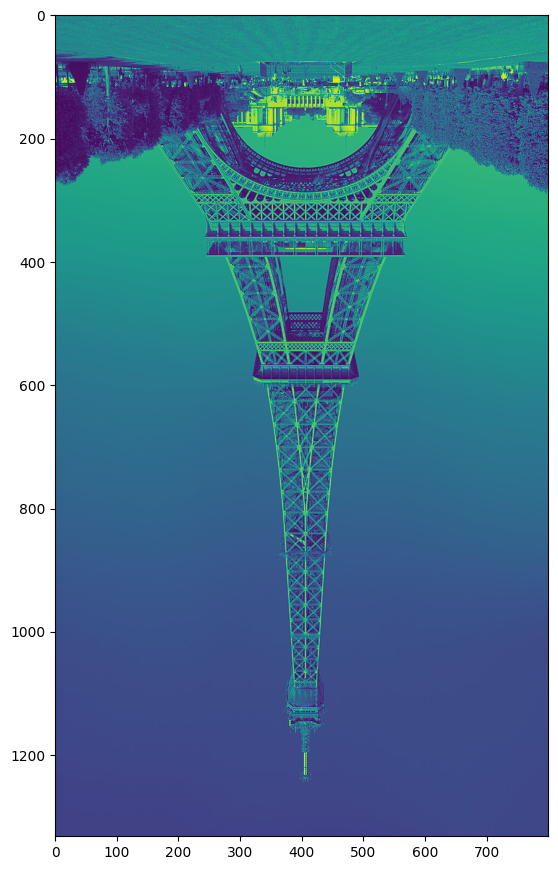

In [24]:
fig = plt.figure(1, figsize=(14, 12))
ax = fig.add_subplot(122)
ax = plt.imshow(image_angle_two)  
plt.show()

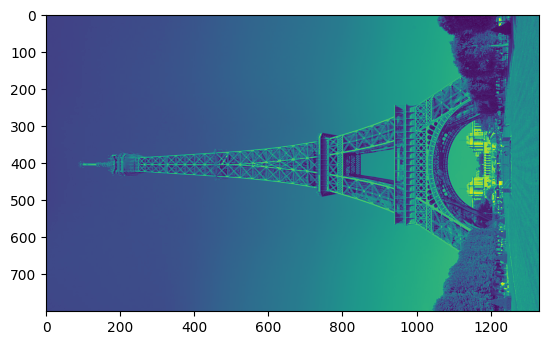

In [25]:
fig = plt.figure(1, figsize=(14, 12))
ax = fig.add_subplot(122)
ax = plt.imshow(image_angle_three)  
plt.show()

In [33]:
def scale_image(original_image): 
  original = cv2.imread(original_image,cv2.IMREAD_GRAYSCALE) 

  image_scale_one = cv2.resize(original, (0, 0), fx = 0.1, fy = 0.1)
  image_scale_two = cv2.resize(original, (780, 540),
  interpolation = cv2.INTER_NEAREST)
  
  return image_scale_one, image_scale_two

In [34]:
image_scale_one, image_scale_two = scale_image(eiffel_1)

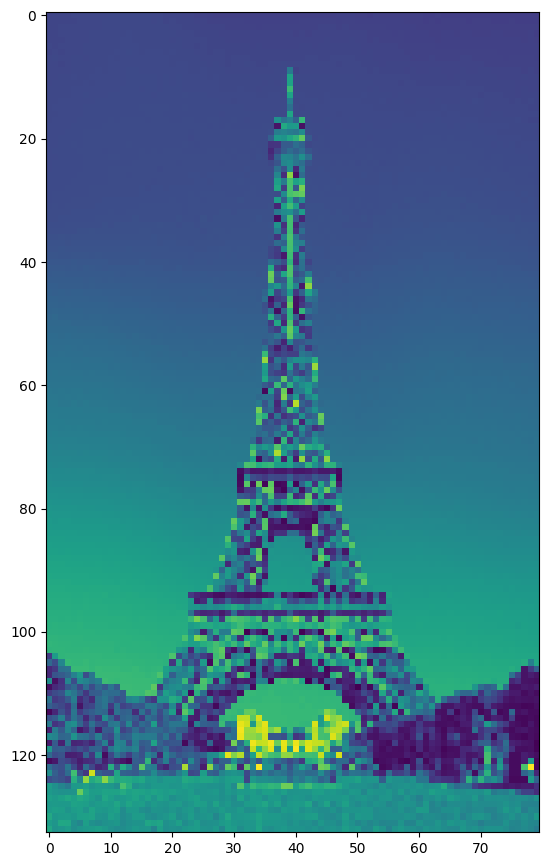

In [37]:
fig = plt.figure(1, figsize=(14, 12))
ax = fig.add_subplot(122)
ax = plt.imshow(image_scale_one)  
plt.show()

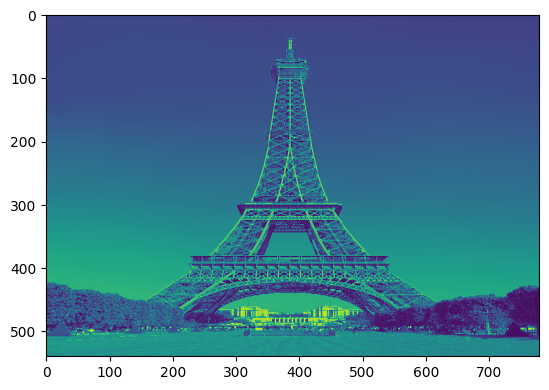

In [38]:
fig = plt.figure(1, figsize=(14, 12))
ax = fig.add_subplot(122)
ax = plt.imshow(image_scale_two)  
plt.show()

# __PART 3__

SEGMENT IMAGE WITH K-MEANS CLUSTERING

In [49]:
def image_segmentation(original_image):
  # read the image
  img1 = cv2.imread(original_image)

  # convert to RGB
  img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

  # reshape the image to a 2D array of pixels and 3 color values (RGB)
  pixel_values = img1.reshape((-1, 3))

  # convert to float
  pixel_values = np.float32(pixel_values)

  # define stopping criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

  # number of clusters (K)
  k = 2
  _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

  # convert back to 8 bit values
  centers = np.uint8(centers)

  # flatten the labels array
  labels = labels.flatten()

  # convert all pixels to the color of the centroids
  segmented_image = centers[labels.flatten()]

  # reshape back to the original image dimension
  segmented_image = segmented_image.reshape(img1.shape)
  
  # # show the image
  # plt.imshow(segmented_image)
  # plt.show()

  return segmented_image


In [50]:
image_segmentation_one = image_segmentation(eiffel_1)

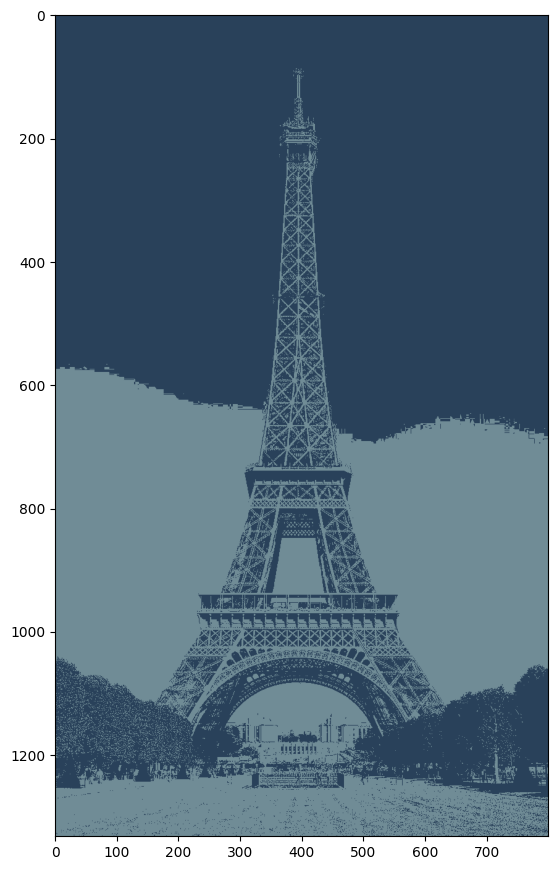

In [51]:
fig = plt.figure(1, figsize=(14, 12))
ax = fig.add_subplot(122)
ax = plt.imshow(image_segmentation_one)  
plt.show()